# Stack Overflow Survey Trends 


_______________________

## Methodology

### 1. Data Collection
The dataset used for this analysis is the developer survey data gained from Stack Overflow. The dataset was loaded into a Pandas DataFrame for exploration and analysis.

### 2. Data Cleaning
Missing Data Removal: Columns with over 60% missing values were dropped to ensure the quality of data analysis. This step removed the columns NEWJobHunt, NEWJobHuntResearch, and NEWLearn.
Missing Data Visualization: Missing values for Employment and DevType were identified and visualized using bar charts grouped by country.
Row Filtering: Rows with missing values for Employment and DevType were filtered out.
### 3. Feature Engineering
Developer Analysis by Country:
New columns representing different developer types (BackEnd, FrontEnd, FullStack, Mobile, Admin, and Data Scientist) were created based on the DevType column.
The dataset was melted to create a single column for developer categories and their respective flags.
Developer Analysis by Major:
Missing values in UndergradMajor were filled with backward fill (bfill) to maintain consistency for respondents across years.
New columns were created representing various educational backgrounds (SocialScience, NaturalScience, ComSci, OtherEng, Data, NoMajor).
The dataset was melted to consolidate educational categories.
### 4. Years of Experience & Compensation Relationship
Missing values in YearsCodePro and ConvertedComp were filled using IterativeImputer.
The YearsCodePro column was binned into quartiles to understand salary trends by experience level.
A boxplot was used to visualize the relationship between experience levels and compensation.
### 5. Average Salaries by Developer Type
Developer types were extracted into separate columns and converted to flags.
The dataset was melted for a consolidated view of developer categories.
The average salary for each developer type was computed and visualized using a bar chart.

_____________________

## Exploratory Data Analysis

### Cleaning and Preprocessing the data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

ImportError: IterativeImputer is experimental and the API might change without any deprecation cycle. To use it, you need to explicitly import enable_iterative_imputer:
from sklearn.experimental import enable_iterative_imputer

In [ ]:
dev_df = pd.read_csv('developer_dataset.csv')
dev_df.head()

C:\Users\Hande\AppData\Local\Temp\ipykernel_14924\2159864899.py:1: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  dev_df = pd.read_csv('developer_dataset.csv')


,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,...,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs,NEWJobHunt,NEWJobHuntResearch,NEWLearn
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,141000.0,NaN,NaN,NaN,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,...,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0,NaN,NaN,NaN
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,...,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN,NaN,NaN,Once a year
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",...,Azure,NaN,NaN,4.0,NaN,48000.0,NaN,NaN,NaN,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0,NaN,NaN,NaN


In [ ]:
dev_df.columns

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')

In [ ]:
dev_df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

In [ ]:
dev_df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


### Removing Highly Missing Data

In [ ]:
# Calculating missing percentage of each column
maxRows = dev_df['RespondentID'].count()

print((1- dev_df.count()/maxRows)*100)


RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


In [ ]:
# Drop columns with more than 60% missing values
dev_df.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'], axis=1, inplace=True)

### Developer Analysis by Country

In [ ]:
#Counting the respondents from each country
dev_df[['RespondentID', 'Country']].groupby('Country').count()

,RespondentID
Country,
Canada,8979
China,2072
France,6861
Germany,16215
Japan,1049
Mexico,1918
Spain,4534
United Kingdom,15854
United States,53727


In [ ]:
#Calculating the number of missing values in the Employment and DevType columns grpuped by Country
missingData = dev_df[['Employment', 'DevType']].isnull().groupby(dev_df['Country']).sum().reset_index()

In [ ]:
missingData

,Country,Employment,DevType
0,Canada,148,944
1,China,139,491
2,France,104,848
3,Germany,386,1691
4,Japan,13,109
5,Mexico,25,207
6,Spain,74,434
7,United Kingdom,196,1472
8,United States,699,4580


C:\Users\Hande\AppData\Local\Temp\ipykernel_14924\1024119643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  A=sns.catplot(
C:\Users\Hande\AppData\Local\Temp\ipykernel_14924\1024119643.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  B=sns.catplot(


Text(-3.6805555555555483, 0.5, 'Number of Missing Values')

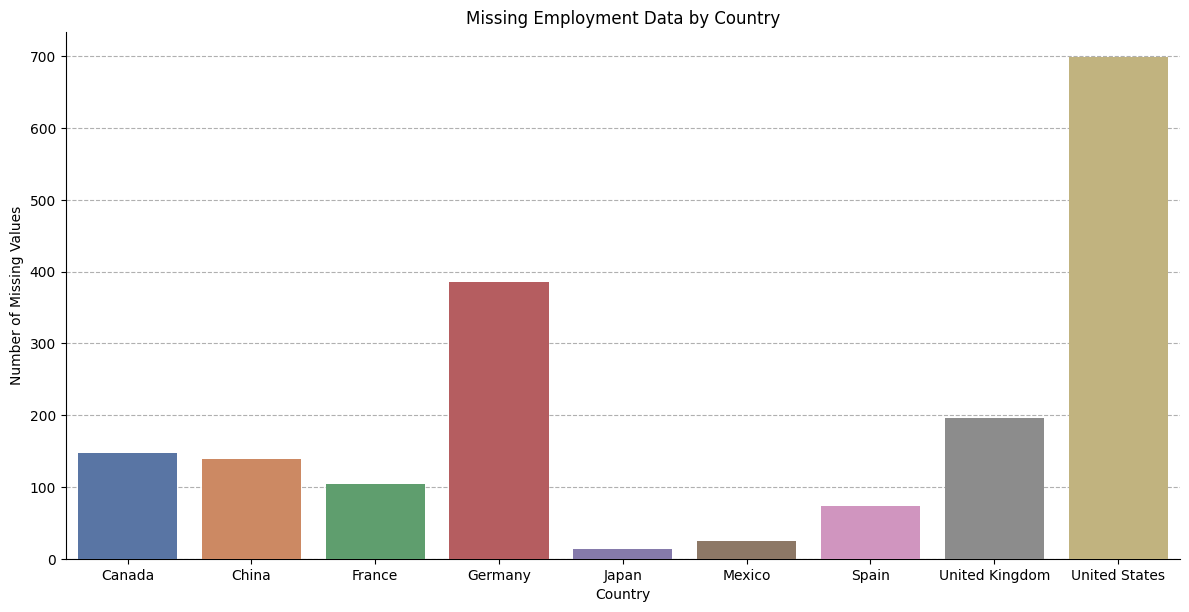

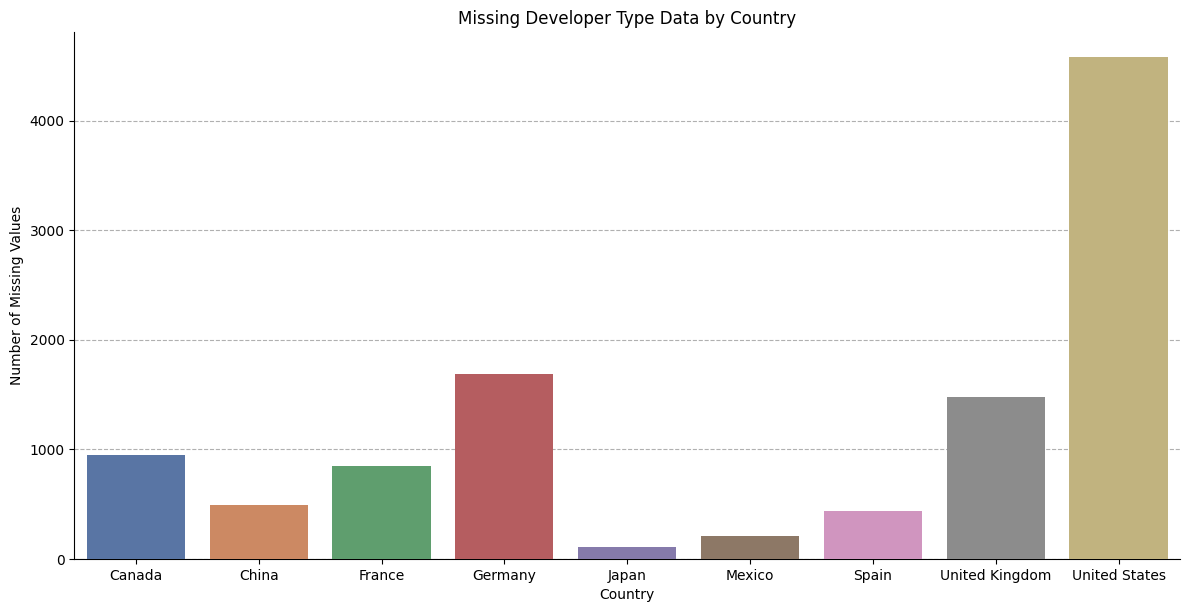

In [ ]:
#Visualizing the missing values in the Employment and DevType columns grouped by Country
A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment", palette="deep", height = 6, aspect = 2, zorder=4)
plt.grid(axis='y', linestyle='--', zorder=3)
plt.title('Missing Employment Data by Country')
plt.ylabel('Number of Missing Values') 

B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2, palette="deep", zorder=4)
plt.title('Missing Developer Type Data by Country')
plt.grid(axis='y', linestyle='--', zorder=3)
plt.ylabel('Number of Missing Values') 

In [ ]:
#Dropping rows with missing values in the Employment and DevType columns
dev_df.dropna(subset = ['Employment','DevType'],
    inplace = True,
    how = 'any')

C:\Users\Hande\AppData\Local\Temp\ipykernel_14924\1388245089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  empfig = sns.catplot(x="Country", col="Employment",


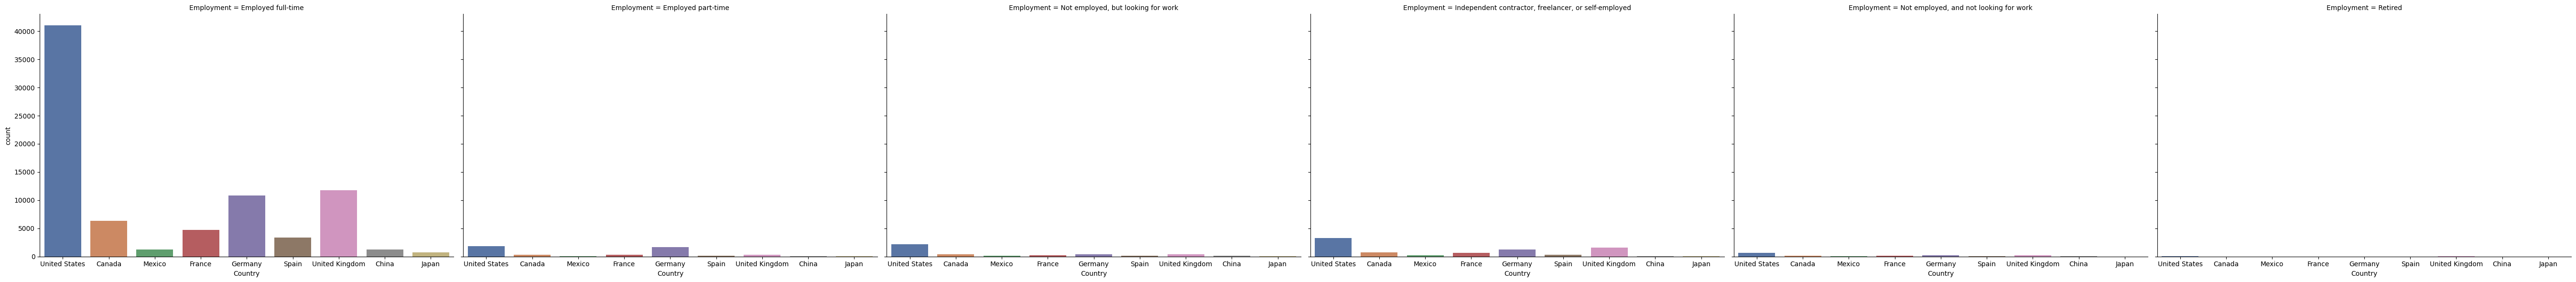

In [ ]:
#Calculating the number of missing values in the Employment and DevType columns grpuped by Country
empfig = sns.catplot(x="Country", col="Employment",
                data=dev_df, kind="count",
                height=6, aspect=1.5, palette="deep")


In [ ]:
#Creating a new dataframe with only the Country and DevType columns
dev_country = dev_df[['Country','DevType']]

In [ ]:
#Creating new columns for each of the DevType categories (basic developer types such as back-end, front-end, full-stack, mobile, administrator, data scientist)

dev_country.loc[dev_country['DevType'].str.contains('(?i)back-end', case=False, na=False), 'BackEnd'] = True
dev_country.loc[dev_country['DevType'].str.contains('(?i)front-end', case=False, na=False), 'FrontEnd'] = True
dev_country.loc[dev_country['DevType'].str.contains('(?i)full-stack', case=False, na=False), 'FullStack'] = True
dev_country.loc[dev_country['DevType'].str.contains('(?i)mobile', case=False, na=False), 'Mobile'] = True
dev_country.loc[dev_country['DevType'].str.contains('(?i)administrator', case=False, na=False), 'Admin'] = True
dev_country.loc[dev_country['DevType'].str.contains('(?i)data', case=False, na=False), 'Data Scientist'] = True



In [ ]:
#melting the dataframe to have a single column for the developer category and a flag for each category
dev_country = dev_country.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin', 'Data Scientist'], 
    var_name='DevCat',
    value_name='DevFlag')

In [ ]:
dev_country.dropna(how='any', inplace=True)

C:\Users\Hande\AppData\Local\Temp\ipykernel_14924\1772607069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  devFig = sns.catplot(x="Country", col="DevCat",


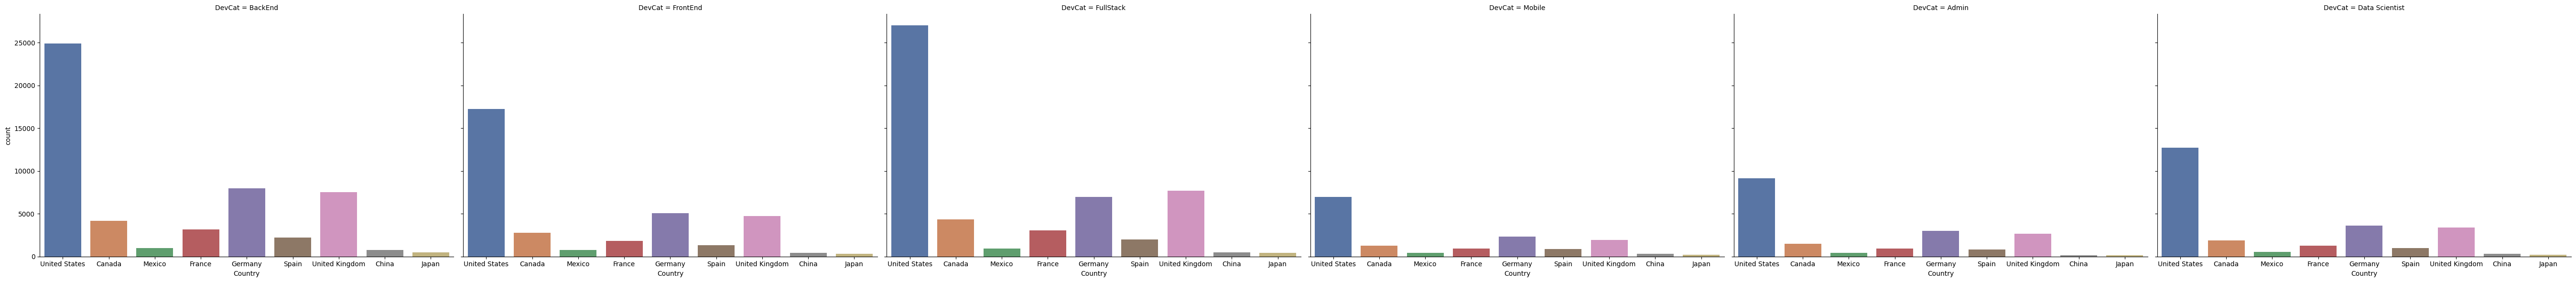

In [ ]:
devFig = sns.catplot(x="Country", col="DevCat",
                data=dev_country, kind="count",
                height=6, aspect=1.5, palette="deep");

### Developer Analysis by Major

C:\Users\Hande\AppData\Local\Temp\ipykernel_14924\3727403506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Year", y="UndergradMajor",


Text(0.5, 1.0, 'Missing Undergraduate Major Data by Year')

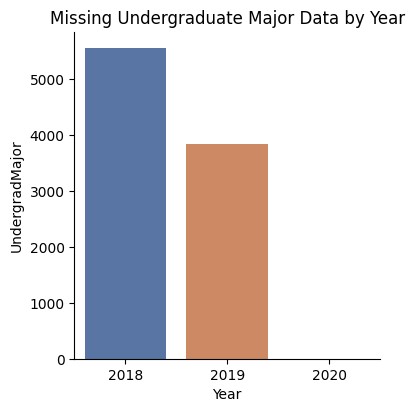

In [ ]:
missingUndergrad = dev_df['UndergradMajor'].isnull().groupby(dev_df['Year']).sum().reset_index()

sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",palette="deep",
                height=4, aspect=1)

plt.title('Missing Undergraduate Major Data by Year')

In [ ]:
#Sorting the dataframe by RespondentID and Year
dev_df =  dev_df.sort_values(['RespondentID', 'Year'])


In [ ]:
#Filling missing values in the UndergradMajor column with the previous value
dev_df['UndergradMajor'].bfill(axis=0, inplace=True)

In [ ]:
#Checking for unique values in the UndergradMajor column
dev_df.UndergradMajor.unique()

array(['Computer science, computer engineering, or software engineering',
       'Fine arts or performing arts (ex. graphic design, music, studio art)',
       'Information systems, information technology, or system administration',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A social science (ex. anthropology, psychology, political science)',
       'Web development or web design',
       'Another engineering discipline (ex. civil, electrical, mechanical)',
       'A humanities discipline (ex. literature, history, philosophy)',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
       'A natural science (such as biology, chemistry, physics, etc.)',
       'A business discipline (ex. accounting, finance, marketing)',
       'Mathematics or statistics',
       'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'A natural science (ex. biology, chemistry, physics)',
    

In [ ]:
#Creating a new dataframe with only the Year and UndergradMajor columns
edudf = dev_df[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)data'), 'Data'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True


In [ ]:
#Melting the dataframe to have the Year, EduCat and EduFlag columns
edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor', 'Data'], 
    var_name='EduCat',
    value_name='EduFlag')

In [ ]:
#Dropping rows with missing values and grouping by Year and EduCat
edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()

C:\Users\Hande\AppData\Local\Temp\ipykernel_14924\300434971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",


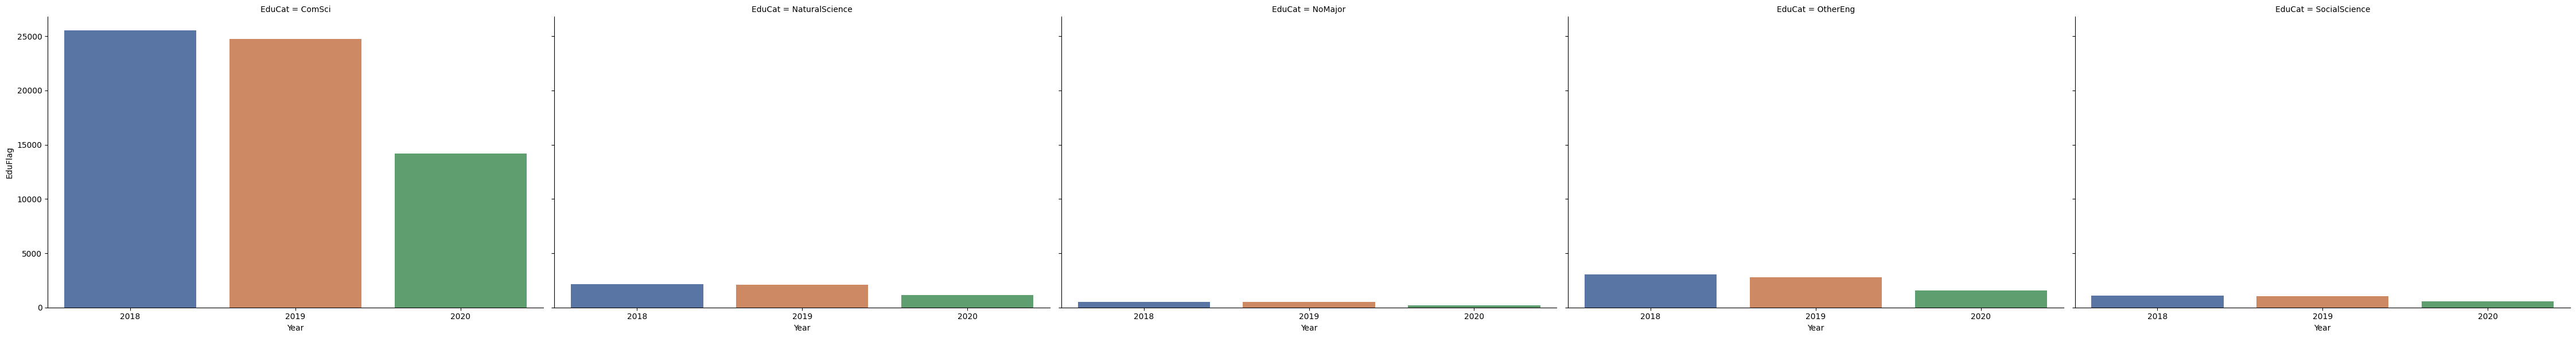

In [ ]:
#Plotting the number of respondents in each category of the EduCat column
eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar", palette="deep",
                height=6, aspect=1.5);


### Years of Experience & Compensation Relationship

In [ ]:
#create a new dataframe with only the Year, YearsCodePro and ConvertedComp columns
compensationFields = dev_df[['Year', 'YearsCodePro', 'ConvertedComp']]
compensationFields


,Year,YearsCodePro,ConvertedComp
0,2018,NaN,141000.0
1,2019,1.0,61000.0
3,2018,4.0,48000.0
4,2019,8.0,90000.0
5,2020,13.0,116000.0
...,...,...,...
111187,2018,NaN,93000.0
111188,2018,NaN,116000.0
111190,2018,NaN,8000.0
111191,2018,NaN,71000.0


C:\Users\Hande\AppData\Local\Temp\ipykernel_14924\3461573420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig_Comp =  sns.boxplot(x='Year', y='ConvertedComp', data= compensationFields, palette='deep')


Text(0, 0.5, 'Compensation (log scale)')

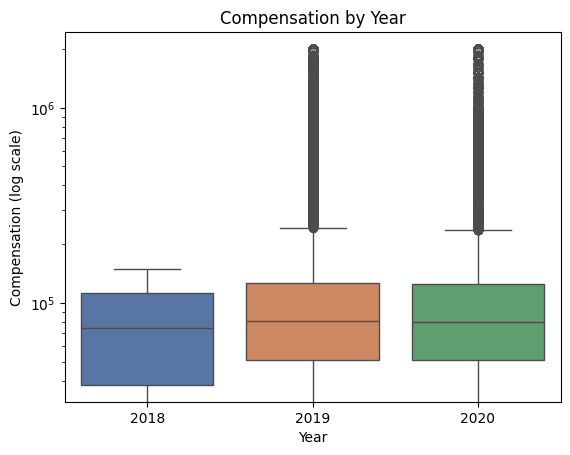

In [ ]:
#Visualizing the distribution of the YearsCodePro column
fig_Comp =  sns.boxplot(x='Year', y='ConvertedComp', data= compensationFields, palette='deep')
fig_Comp.set_yscale('log')
fig_Comp.set_title('Compensation by Year')
plt.ylabel('Compensation (log scale)')

C:\Users\Hande\AppData\Local\Temp\ipykernel_14924\341486185.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig_Code = sns.boxplot(x='Year', y='YearsCodePro', data = compensationFields, palette='deep')


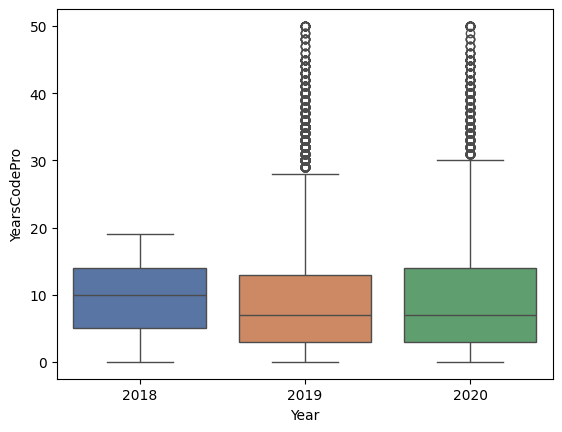

In [ ]:
fig_Code = sns.boxplot(x='Year', y='YearsCodePro', data = compensationFields, palette='deep')

In [ ]:
# Creating a new dataframe with only the YearsCodePro and ConvertedComp columns

imputedf = dev_df[['YearsCodePro','ConvertedComp']]

traindf, testdf = train_test_split(imputedf, train_size=0.1)

# Creating the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)

# Fitting the model to the the test dataset
imp.fit(imputedf)

# Transforming the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])


#The above code will loop through (up to 20 times), and fill in the missing data based on the context provided by the other column. 
#This will create data points that are indicative of the overall trend of the data. Now, we can analyze the relationship between YearsCodePro and ConvertedComp through the use of a boxplot

C:\Users\Hande\AppData\Local\Temp\ipykernel_14924\27169693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=4)
C:\Users\Hande\AppData\Local\Temp\ipykernel_14924\27169693.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CodeYearBins", y="ConvertedComp",


<Axes: xlabel='CodeYearBins', ylabel='ConvertedComp'>

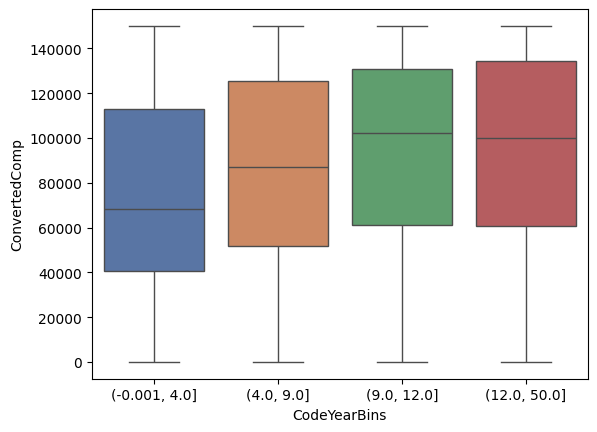

In [ ]:
# Creating a new column to bin the YearsCodePro column
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=4)

# Visualizing the relationship between YearsCodePro and ConvertedComp
sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf, palette="deep")


## Average Salaries by Developer Type

In [ ]:
#Creating a new dataframe with only the ConvertedComp and DevType columns
dev_salary_lang = dev_df[['ConvertedComp','DevType']]

dev_salary_lang.loc[dev_salary_lang['DevType'].str.contains('(?i)back-end', case=False, na=False), 'BackEnd'] = True
dev_salary_lang.loc[dev_salary_lang['DevType'].str.contains('(?i)front-end', case=False, na=False), 'FrontEnd'] = True
dev_salary_lang.loc[dev_salary_lang['DevType'].str.contains('(?i)full-stack', case=False, na=False), 'FullStack'] = True
dev_salary_lang.loc[dev_salary_lang['DevType'].str.contains('(?i)mobile', case=False, na=False), 'Mobile'] = True
dev_salary_lang.loc[dev_salary_lang['DevType'].str.contains('(?i)administrator', case=False, na=False), 'Admin'] = True
dev_salary_lang.loc[dev_salary_lang['DevType'].str.contains('(?i)data', case=False, na=False), 'Data Scientist'] = True



dev_salary_lang = dev_salary_lang.melt(id_vars=['ConvertedComp'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin', 'Data Scientist'], 
    var_name='DevCat',
    value_name='DevFlag')



C:\Users\Hande\AppData\Local\Temp\ipykernel_14924\1571614491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.catplot(x="DevCat", y="ConvertedComp", palette="deep", data=salary_avg, kind="bar", height=6, aspect=2, zorder=3)


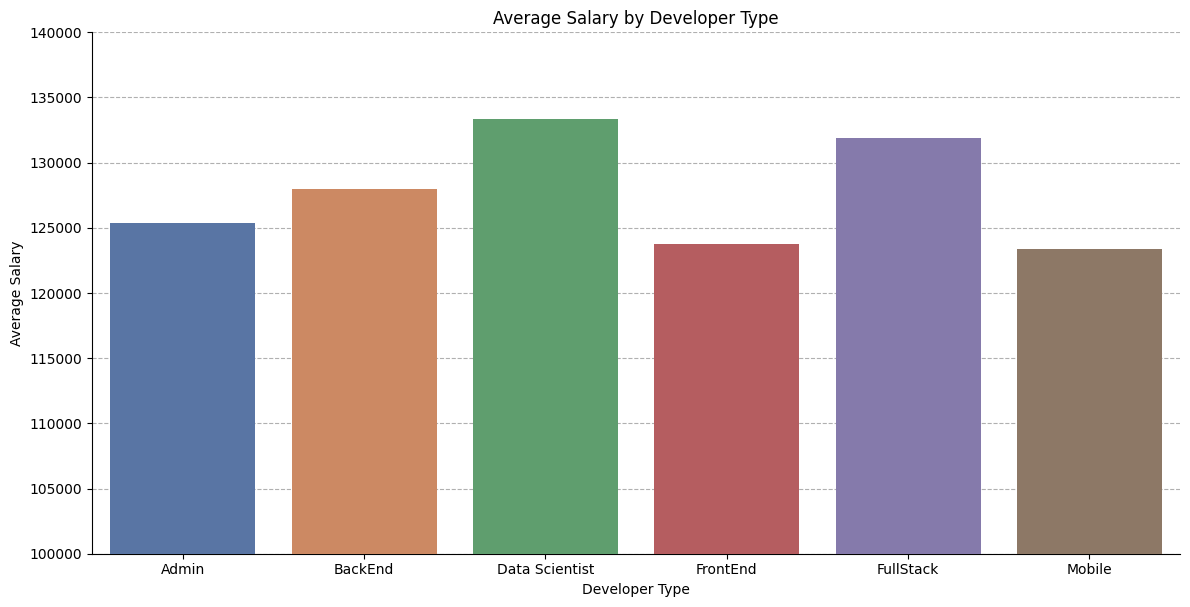

In [ ]:
# Calculating the average salary for each developer type
salary_avg = dev_salary_lang[dev_salary_lang['DevFlag'] == True].groupby('DevCat').mean()

# Visualizing the average salary for each developer type
a = sns.catplot(x="DevCat", y="ConvertedComp", palette="deep", data=salary_avg, kind="bar", height=6, aspect=2, zorder=3)
plt.ylim(100000, 140000)
plt.xlabel('Developer Type')
plt.ylabel('Average Salary')
plt.title('Average Salary by Developer Type')
plt.grid(axis='y', linestyle='--', zorder=0)

__________________

## Conclusions

### 1. Developer Distribution by Country:
The majority of respondents are concentrated in specific countries, providing insights into global developer trends.
Missing values in Employment and DevType varied significantly across countries.
### 2. Popular Developer Roles:
Backend, Frontend, and Full Stack developers are the most common roles across all surveyed countries.
The distribution of developer types shows regional preferences in the developer job market.
### 3. Educational Background Trends:
Computer Science remains the most common educational background among developers, followed by engineering fields.
The trend suggests a growing interest in computer science education across the years.
### 4. Years of Experience & Compensation:
There is a clear upward trend in compensation with years of professional coding experience.
Developers with more than 10 years of professional experience consistently command higher salaries.
### 5. Average Salaries by Developer Type:
Data Scientists and Full Stack Developers tend to have higher average salaries compared to other developer types.
Backend, Frontend, and Mobile Developers also have competitive salaries.

______________

## Recommendations

### 1. Targeted Educational Outreach:
Encourage educational institutions to focus on computer science and data science programs due to the demand in these fields.
### 2. Professional Development:
Developers should pursue continuous learning, especially in data science and full-stack development, to maximize salary potential.
### 3. Global Collaboration:
Companies should leverage remote work opportunities to tap into global developer talent, addressing the regional disparities observed in developer roles.
### 4.Further Analysis:
Investigate the correlation between different programming languages/frameworks and compensation.
Study developer satisfaction trends based on role and salary.